## Similarity measure for image registration
From wiki:
>Image similarities are broadly used in medical imaging. An image similarity measure quantifies the degree of similarity between intensity patterns in two images.[2] The choice of an image similarity measure depends on the modality of the images to be registered. Common examples of image similarity measures include cross-correlation, mutual information, sum of squared intensity differences, and ratio image uniformity. Mutual information and normalized mutual information are the most popular image similarity measures for registration of multimodality images. Cross-correlation, sum of squared intensity differences and ratio image uniformity are commonly used for registration of images in the same modality.

In [67]:
cd ../brainmix_register/

[Errno 2] No such file or directory: '../brainmix_register/brainmix_register/'
/Users/kristiworkstudy/Documents/UO_DS/projects/mousebrain/brainmix_register/brainmix_register


In [68]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from skimage import data, img_as_float
from skimage.measure import structural_similarity as ssim
from skimage.feature import register_translation
from skimage.feature.register_translation import _upsampled_dft
from scipy.ndimage.fourier import fourier_shift
import registration as reg

import os, glob
from skimage import io
%matplotlib inline 

matplotlib.rcParams['font.size'] = 9

def mse(x, y):
    return np.linalg.norm(x - y)



In [69]:
#---------Create registration stack------------
inputDir = '../data/test/'
imageFiles = glob.glob(os.path.join(inputDir, '*.jpg'))
imageVolume = io.ImageCollection(imageFiles, as_grey=True).concatenate()
stack = imageVolume

reg_stack = reg.registration(stack)

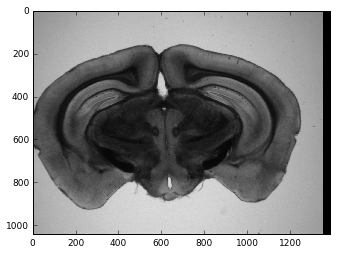

In [70]:
io.imshow(reg_stack[2])

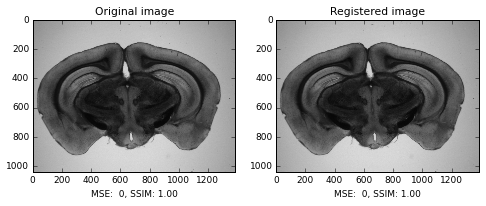

In [71]:
img = stack[0]
reg_img = reg_stack[0]

mse_none = mse(img, img)
ssim_none = ssim(img, img)

mse_reg = mse(img, reg_img)
ssim_reg = ssim(img, reg_img)

label = 'MSE: %2.f, SSIM: %.2f'

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ax0.imshow(img, cmap=plt.cm.gray, vmin=0, vmax=1)
ax0.set_xlabel(label % (mse_none, ssim_none))
ax0.set_title('Original image')

ax1.imshow(reg_img, cmap=plt.cm.gray, vmin=0, vmax=1)
ax1.set_xlabel(label % (mse_reg, ssim_reg))
ax1.set_title('Registered image')

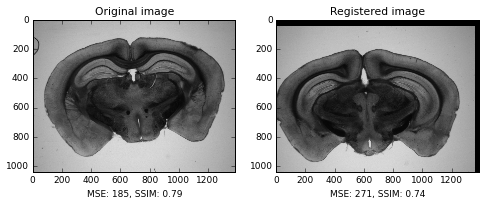

In [72]:
src = stack[0]
img = stack[1]
reg_img = reg_stack[1]

mse_none = mse(src, img)
ssim_none = ssim(src, img)

mse_reg = mse(src, reg_img)
ssim_reg = ssim(src, reg_img)

label = 'MSE: %2.f, SSIM: %.2f'

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ax0.imshow(img, cmap=plt.cm.gray, vmin=0, vmax=1)
ax0.set_xlabel(label % (mse_none, ssim_none))
ax0.set_title('Original image')

ax1.imshow(reg_img, cmap=plt.cm.gray, vmin=0, vmax=1)
ax1.set_xlabel(label % (mse_reg, ssim_reg))
ax1.set_title('Registered image')

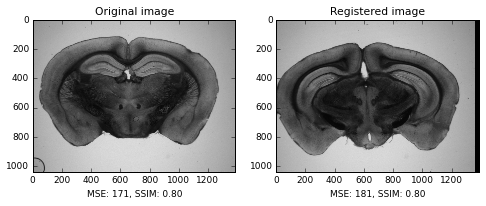

In [73]:
src = stack[0]
img = stack[2]
reg_img = reg_stack[2]

mse_none = mse(src, img)
ssim_none = ssim(src, img)

mse_reg = mse(src, reg_img)
ssim_reg = ssim(src, reg_img)

label = 'MSE: %2.f, SSIM: %.2f'

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ax0.imshow(img, cmap=plt.cm.gray, vmin=0, vmax=1)
ax0.set_xlabel(label % (mse_none, ssim_none))
ax0.set_title('Original image')

ax1.imshow(reg_img, cmap=plt.cm.gray, vmin=0, vmax=1)
ax1.set_xlabel(label % (mse_reg, ssim_reg))
ax1.set_title('Registered image')

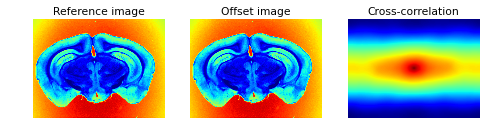

In [74]:
#----------Control image (image registered to itself)--------
src = stack[0]
reg_img = reg_stack[0]

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(8, 3))

shift, error, diffphase = register_translation(src, reg_img)

ax1.imshow(src)
ax1.set_axis_off()
ax1.set_title('Reference image')

ax2.imshow(reg_img.real)
ax2.set_axis_off()
ax2.set_title('Offset image')

# View the output of a cross-correlation to show what the algorithm is
#    doing behind the scenes


image_product = np.fft.fft2(src) * np.fft.fft2(reg_img).conj()
cc_image = np.fft.fftshift(np.fft.ifft2(image_product))
ax3.imshow(cc_image.real)
ax3.set_axis_off()
ax3.set_title("Cross-correlation")

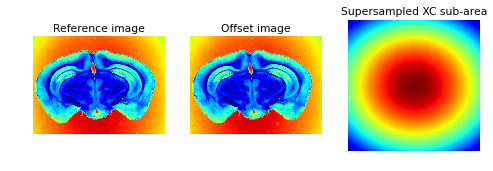

Detected subpixel offset (y, x):
[ 0.  0.]


In [75]:
image = src
offset_image = reg_img

# subpixel precision
shift, error, diffphase = register_translation(image, offset_image, 100)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(8, 3))

ax1.imshow(image)
ax1.set_axis_off()
ax1.set_title('Reference image')

ax2.imshow(offset_image.real)
ax2.set_axis_off()
ax2.set_title('Offset image')

# Calculate the upsampled DFT, again to show what the algorithm is doing
#    behind the scenes.  Constants correspond to calculated values in routine.
#    See source code for details.
cc_image = _upsampled_dft(image_product, 150, 100, (shift*100)+75).conj()
ax3.imshow(cc_image.real)
ax3.set_axis_off()
ax3.set_title("Supersampled XC sub-area")


plt.show()

print("Detected subpixel offset (y, x):")
print(shift)

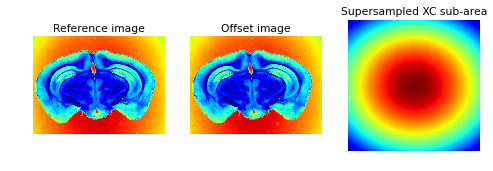

Detected subpixel offset (y, x):
[ 0.  0.]


In [76]:
image = src
offset_image = reg_img

# subpixel precision
shift, error, diffphase = register_translation(image, offset_image, 100)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(8, 3))

ax1.imshow(image)
ax1.set_axis_off()
ax1.set_title('Reference image')

ax2.imshow(offset_image.real)
ax2.set_axis_off()
ax2.set_title('Offset image')

# Calculate the upsampled DFT, again to show what the algorithm is doing
#    behind the scenes.  Constants correspond to calculated values in routine.
#    See source code for details.
cc_image = _upsampled_dft(image_product, 150, 100, (shift*100)+75).conj()
ax3.imshow(cc_image.real)
ax3.set_axis_off()
ax3.set_title("Supersampled XC sub-area")


plt.show()

print("Detected subpixel offset (y, x):")
print(shift)

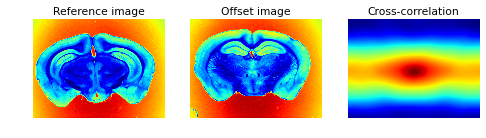

In [77]:
#------Unregistered image---------
src = stack[0]
reg_img = stack[2] #Use unregistered image

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(8, 3))

shift, error, diffphase = register_translation(src, reg_img)

ax1.imshow(src)
ax1.set_axis_off()
ax1.set_title('Reference image')

ax2.imshow(reg_img.real)
ax2.set_axis_off()
ax2.set_title('Offset image')

# View the output of a cross-correlation to show what the algorithm is
#    doing behind the scenes


image_product = np.fft.fft2(src) * np.fft.fft2(reg_img).conj()
cc_image = np.fft.fftshift(np.fft.ifft2(image_product))
ax3.imshow(cc_image.real)
ax3.set_axis_off()
ax3.set_title("Cross-correlation")

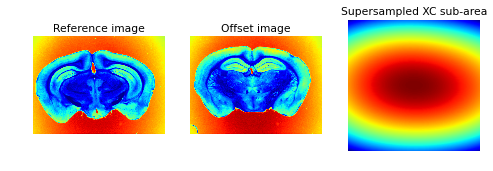

Detected subpixel offset (y, x):
[ 35.4   -1.19]


In [78]:
image = src
offset_image = reg_img

# subpixel precision
shift, error, diffphase = register_translation(image, offset_image, 100)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(8, 3))

ax1.imshow(image)
ax1.set_axis_off()
ax1.set_title('Reference image')

ax2.imshow(offset_image.real)
ax2.set_axis_off()
ax2.set_title('Offset image')

# Calculate the upsampled DFT, again to show what the algorithm is doing
#    behind the scenes.  Constants correspond to calculated values in routine.
#    See source code for details.
cc_image = _upsampled_dft(image_product, 150, 100, (shift*100)+75).conj()
ax3.imshow(cc_image.real)
ax3.set_axis_off()
ax3.set_title("Supersampled XC sub-area")


plt.show()

print("Detected subpixel offset (y, x):")
print(shift)

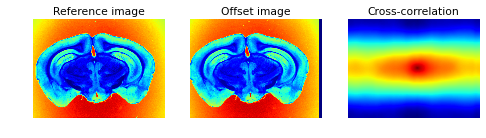

In [79]:
#-------------Registered image--------------
src = stack[0]
reg_img = reg_stack[2] #Use unregistered image

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(8, 3))

shift, error, diffphase = register_translation(src, reg_img)

ax1.imshow(src)
ax1.set_axis_off()
ax1.set_title('Reference image')

ax2.imshow(reg_img.real)
ax2.set_axis_off()
ax2.set_title('Offset image')

# View the output of a cross-correlation to show what the algorithm is
#    doing behind the scenes


image_product = np.fft.fft2(src) * np.fft.fft2(reg_img).conj()
cc_image = np.fft.fftshift(np.fft.ifft2(image_product))
ax3.imshow(cc_image.real)
ax3.set_axis_off()
ax3.set_title("Cross-correlation")

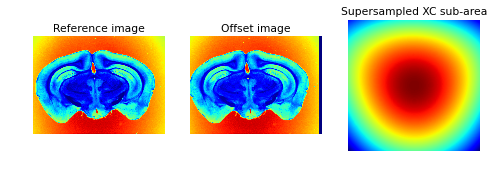

Detected subpixel offset (y, x):
[ -0.7   35.02]


In [80]:
image = src
offset_image = reg_img

# subpixel precision
shift, error, diffphase = register_translation(image, offset_image, 100)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(8, 3))

ax1.imshow(image)
ax1.set_axis_off()
ax1.set_title('Reference image')

ax2.imshow(offset_image.real)
ax2.set_axis_off()
ax2.set_title('Offset image')

# Calculate the upsampled DFT, again to show what the algorithm is doing
#    behind the scenes.  Constants correspond to calculated values in routine.
#    See source code for details.
cc_image = _upsampled_dft(image_product, 150, 100, (shift*100)+75).conj()
ax3.imshow(cc_image.real)
ax3.set_axis_off()
ax3.set_title("Supersampled XC sub-area")


plt.show()

print("Detected subpixel offset (y, x):")
print(shift)